In [1]:
import numpy as np
from pprint import pprint
import sys, os
import matplotlib.pyplot as plt

sys.path.append('utils')
from SetupConnections import *
from NeuronCircuit import Circuit


%load_ext autoreload
%autoreload 2

In [3]:
ar = Arena('params/arenaparams.yaml')
ar.generate_population_firing_rates()

ar.generate_spike_times('MF', dt=0.05, delay=500)
ar.generate_spike_times('MEC', dt=0.05, delay=500)
ar.generate_spike_times('LEC', dt=0.05, delay=500)
ar.generate_spike_times('Background', dt=0.05, delay=500)


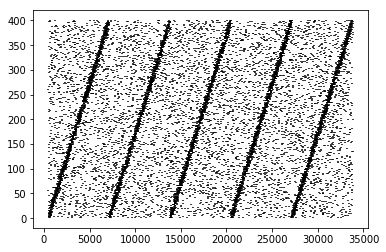

In [4]:
N = ar.cell_information['MF']['ncells']
plt.figure()
for i in range(N):
    plt.vlines(ar.cell_information['MF']['cell info'][i]['spike times'], i+0.5, i+1.5)
plt.show()

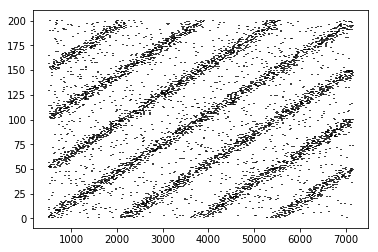

In [4]:
N = ar.cell_information['MEC']['ncells']
plt.figure()
for i in range(N):
    plt.vlines(ar.cell_information['MEC']['cell info'][i]['spike times'], i+0.5, i+1.5)
plt.show()

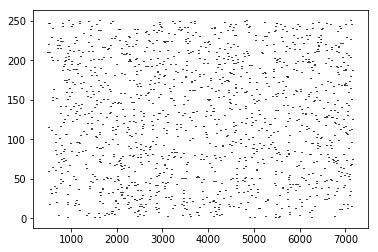

In [5]:
N = ar.cell_information['LEC']['ncells']
plt.figure()
for i in range(N):
    plt.vlines(ar.cell_information['LEC']['cell info'][i]['spike times'], i+0.5, i+1.5)
plt.show()

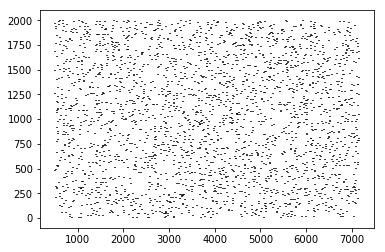

In [6]:
N = ar.cell_information['Background']['ncells']
plt.figure()
for i in range(N):
    plt.vlines(ar.cell_information['Background']['cell info'][i]['spike times'], i+0.5, i+1.5)
plt.show()

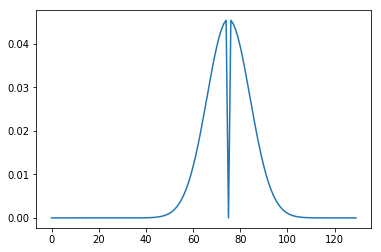

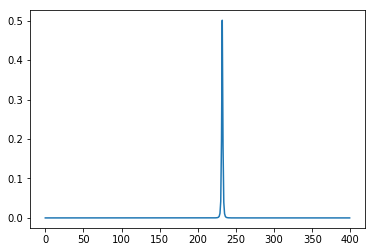

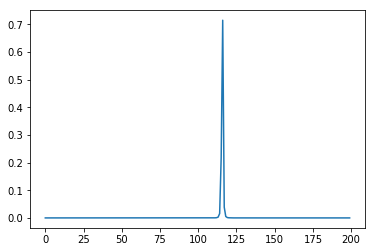

In [39]:
diagram = WiringDiagram('params/circuitparams.yaml')
diagram.generate_internal_connectivity()
diagram.generate_external_connectivity(ar.cell_information)
diagram.generate_septal_connectivity()

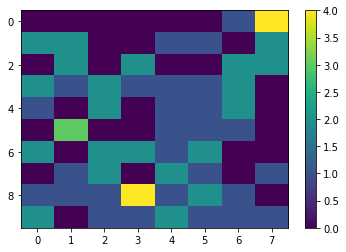

In [7]:
plt.figure()
plt.imshow(diagram.septal_adj_matrices[1], aspect='auto')
plt.colorbar()
plt.show()

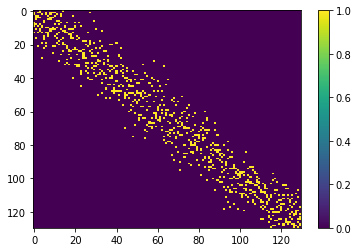

[0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
plt.figure()
plt.imshow(diagram.internal_adj_matrices[0][0], aspect='auto')
plt.colorbar()
plt.show()

print(diagram.internal_adj_matrices[0][0][:,20])

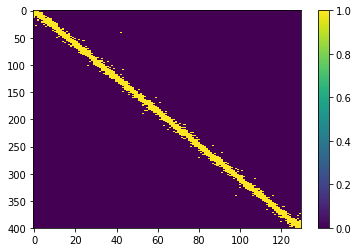

[412 412 412 412 412 412 412 412]


In [41]:
plt.figure()
plt.imshow(diagram.external_adj_matrices[100][0], aspect='auto')
plt.colorbar()
plt.show()

print(diagram.external_adj_matrices[100][1].sum(axis=0))

In [8]:
def pull_spike_times(population2info_dict):
    spike_times = []
    gids = np.sort(list(population2info_dict.keys()))
    for gid in gids:
        spike_times.append(population2info_dict[gid]['spike times'])
    return spike_times

mf_spike_times  = pull_spike_times(ar.cell_information['MF']['cell info'])
mec_spike_times = pull_spike_times(ar.cell_information['MEC']['cell info'])
lec_spike_times = pull_spike_times(ar.cell_information['LEC']['cell info'])
bk_spike_times  = pull_spike_times(ar.cell_information['Background']['cell info'])

In [11]:
circuit = Circuit('params/circuitparams.yaml', diagram.pop2id, diagram.external_pop2id)
circuit.build_cells()
circuit.build_internal_netcons(diagram.internal_adj_matrices)
circuit.build_external_netcons(100, diagram.external_adj_matrices[100], mf_spike_times)
circuit.build_external_netcons(101, diagram.external_adj_matrices[101], mec_spike_times)
circuit.build_external_netcons(102, diagram.external_adj_matrices[102], lec_spike_times)
circuit.build_external_netcons(103, diagram.external_adj_matrices[103], bk_spike_times)
circuit.build_septal_netcons(diagram.septal_adj_matrices)


In [15]:
print((circuit.neurons[1][0].internal_netcons))

[(1, [NetCon[76681]], 'oriT1'), (2, [NetCon[76684]], 'oriT1'), (2, [NetCon[76685]], 'oriT1'), (2, [NetCon[76686]], 'oriT2'), (2, [NetCon[76687]], 'oriT2'), (5, [NetCon[76689]], 'oriT2'), (6, [NetCon[76692]], 'oriT1'), (6, [NetCon[76693]], 'oriT2'), (7, [NetCon[76695]], 'oriT1'), (9, [NetCon[76699]], 'oriT1'), (9, [NetCon[76700]], 'oriT2'), (9, [NetCon[76701]], 'oriT1'), (12, [NetCon[76706]], 'oriT1'), (13, [NetCon[76709]], 'oriT2'), (14, [NetCon[76711]], 'oriT2'), (16, [NetCon[76715]], 'oriT1'), (18, [NetCon[76718]], 'oriT1'), (19, [NetCon[76721]], 'oriT1'), (20, [NetCon[76723]], 'oriT1'), (22, [NetCon[76729]], 'oriT1'), (24, [NetCon[76732]], 'oriT2'), (24, [NetCon[76733]], 'oriT2'), (25, [NetCon[76736]], 'oriT2'), (28, [NetCon[76742]], 'oriT1'), (31, [NetCon[76748]], 'oriT2'), (37, [NetCon[76757]], 'oriT2'), (40, [NetCon[76764]], 'oriT1'), (41, [NetCon[76768]], 'oriT2'), (43, [NetCon[76769]], 'oriT2'), (44, [NetCon[76771]], 'oriT1'), (45, [NetCon[76772]], 'oriT2'), (49, [NetCon[76778]